In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Fraud_check.csv')

In [3]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data1=data.copy()

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
data1=pd.get_dummies(data1, columns=['Undergrad','Marital.Status','Urban'])

In [8]:
data1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [9]:
data1['Taxable.Income']=pd.cut(data1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [10]:
x = data1.iloc[:,1:10]
y = data1.iloc[:,0]

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [12]:
y_train.value_counts()

good     381
risky     99
Name: Taxable.Income, dtype: int64

In [13]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.7291666666666666

In [14]:
pred_train = model.predict(x_train)

In [15]:
accuracy_score(y_train,pred_train) * 100

100.0

In [16]:
confusion_matrix(y_train,pred_train)

array([[381,   0],
       [  0,  99]], dtype=int64)

In [17]:
pred_test = model.predict(x_test)

In [18]:
accuracy_score(y_test,pred_test) * 100

73.33333333333333

In [19]:
confusion_matrix(y_test,pred_test)

array([[86,  9],
       [23,  2]], dtype=int64)

In [20]:
data2=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [21]:
data2

,Actual,Predicted
106,risky,good
544,risky,risky
57,good,good
13,good,good
564,good,good
...,...,...
381,good,good
416,good,good
335,good,good
206,good,risky


In [22]:
col = list(data1.columns)

In [23]:
predictors = col[1:10]
target = col[0]

In [24]:
tree1 = model.estimators_[20]

In [25]:
dot_data = StringIO()

In [26]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)

In [27]:
conda install pydotplus

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\LENOVO\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py39haa95532_0        14.5 MB
    ------------------------------------------------------------
                                           Total:        14.5 MB

The following packages will be UPDATED:

  conda                               4.11.0-py39haa95532_0 --> 4.12.0-py39haa95532_0




conda-4.12.0         | 14.5 MB   |            |   0% 
conda-4.12.0         | 14.5 MB   |            |   0% 
conda-4.12.0         | 14.5 MB   |            |   0% 
conda-4.12.0         | 14.5 MB   | 1          |   1% 
conda-4.12.0         | 14.5 MB   | 2          |   2% 
conda-4.12.0         | 14.5 MB   | 3  

In [28]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [29]:
graph.write_png('fraud_full.png')

True

In [30]:
import matplotlib.image as mpimg 

In [31]:
image=mpimg.imread('C:/Users/LENOVO/AmrutAssignment/RandomForest/fraud_full.png') 

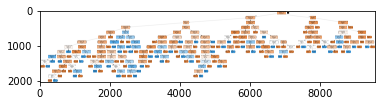

In [32]:
plt.imshow(image)

#### As we can see that test accuracy is 100% and train accuracy is 72%
#### And even from the confusion matrix we can see that 87 are presented correctly while 35 are not

In [33]:
rf= RF(n_estimators=10, max_depth = 3)

In [34]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [35]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [36]:
fi

,feature,importance
0,City.Population,0.522361
1,Work.Experience,0.358481
8,Urban_YES,0.018125
5,Marital.Status_Married,0.017901
4,Marital.Status_Divorced,0.017874
3,Undergrad_YES,0.017570
7,Urban_NO,0.016345
6,Marital.Status_Single,0.015861
2,Undergrad_NO,0.015481


### From this we can conclude that population is the most important feature